In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train_knight = pd.read_csv('./knights/Train_knight.csv')
test_knight = pd.read_csv('./knights/Test_knight.csv')

In [3]:
features = test_knight.columns
features

Index(['Sensitivity', 'Hability', 'Strength', 'Power', 'Agility', 'Dexterity',
       'Awareness', 'Prescience', 'Reactivity', 'Midi-chlorien', 'Slash',
       'Push', 'Pull', 'Lightsaber', 'Survival', 'Repulse', 'Friendship',
       'Blocking', 'Deflection', 'Mass', 'Recovery', 'Evade', 'Stims',
       'Sprint', 'Combo', 'Delay', 'Attunement', 'Empowered', 'Burst',
       'Grasping'],
      dtype='object')

In [4]:
len(features)

30

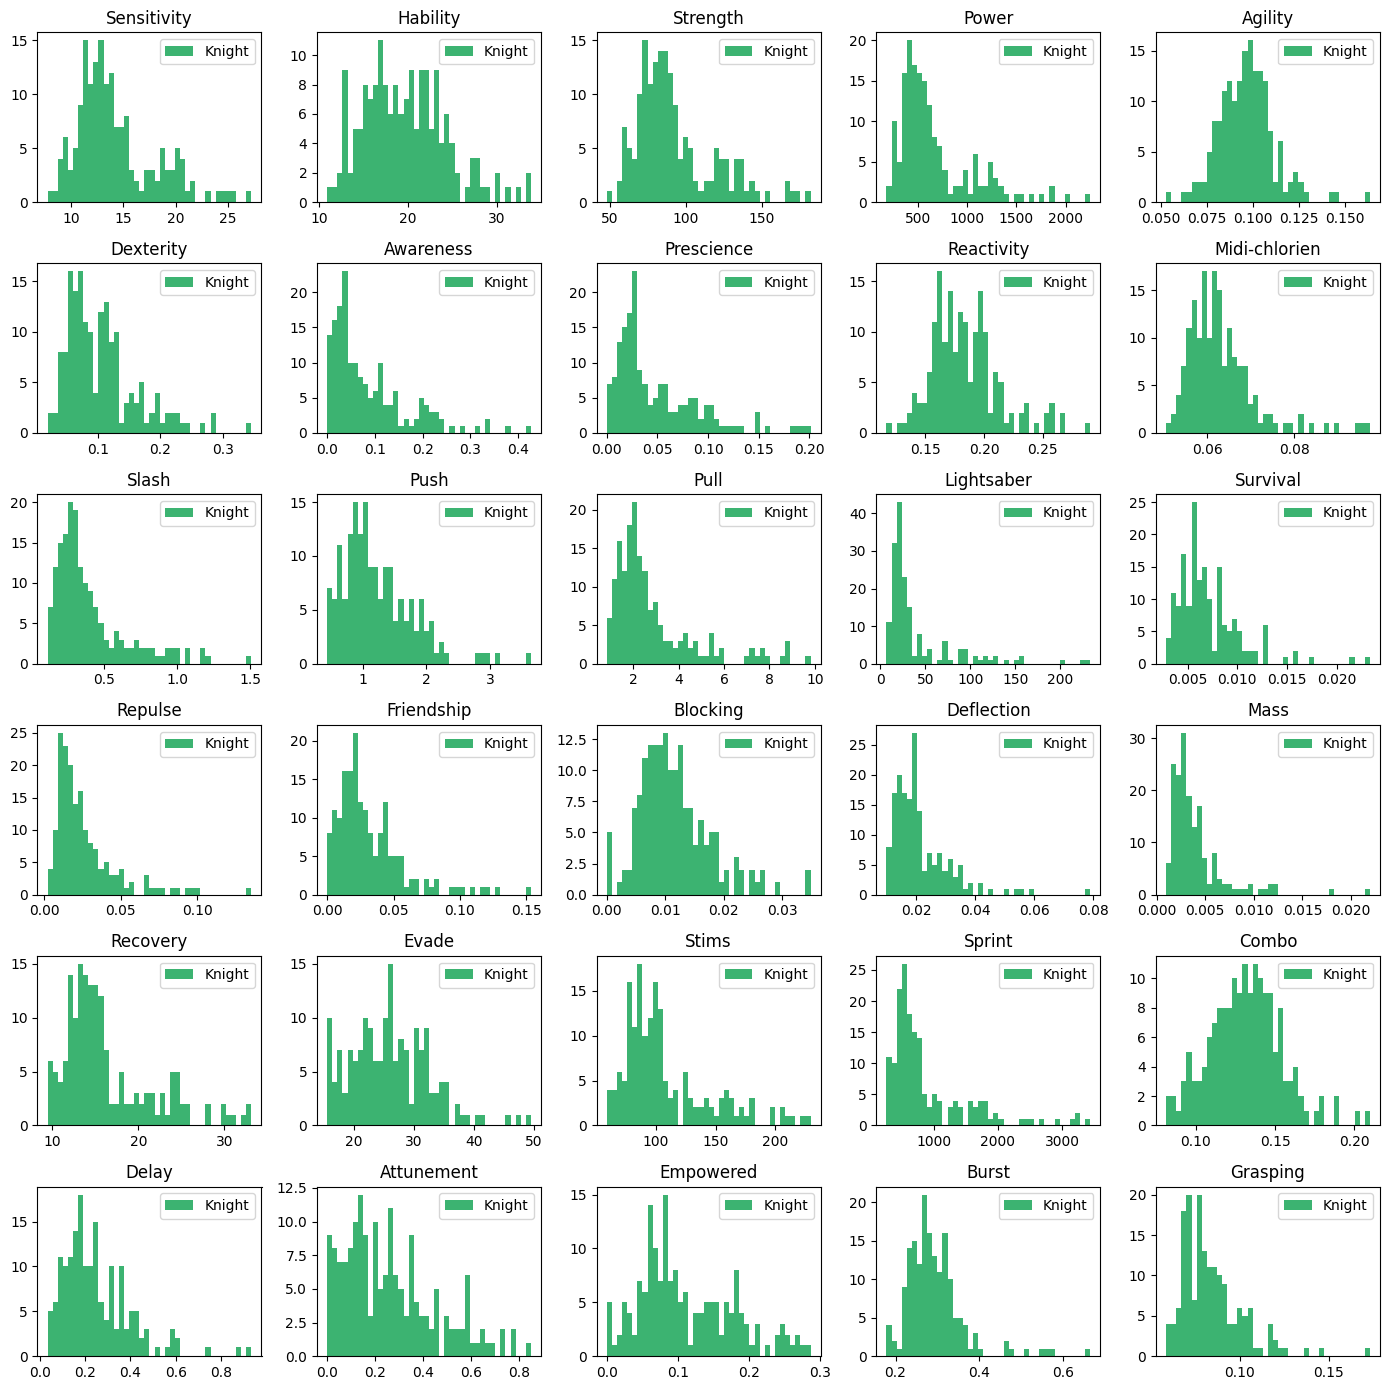

In [5]:
fig, axs = plt.subplots(6, 5, figsize=(14, 14))
for idx, ax in enumerate(axs.flat):
    ax.hist(test_knight[features[idx]], bins=40, color='mediumseagreen', label='Knight')
    ax.legend()
    ax.set_title(f'{features[idx]}')
plt.tight_layout()
plt.show()

In [6]:
features = train_knight.columns

In [7]:
train_knight.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,Sith
3,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,Sith
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,Sith


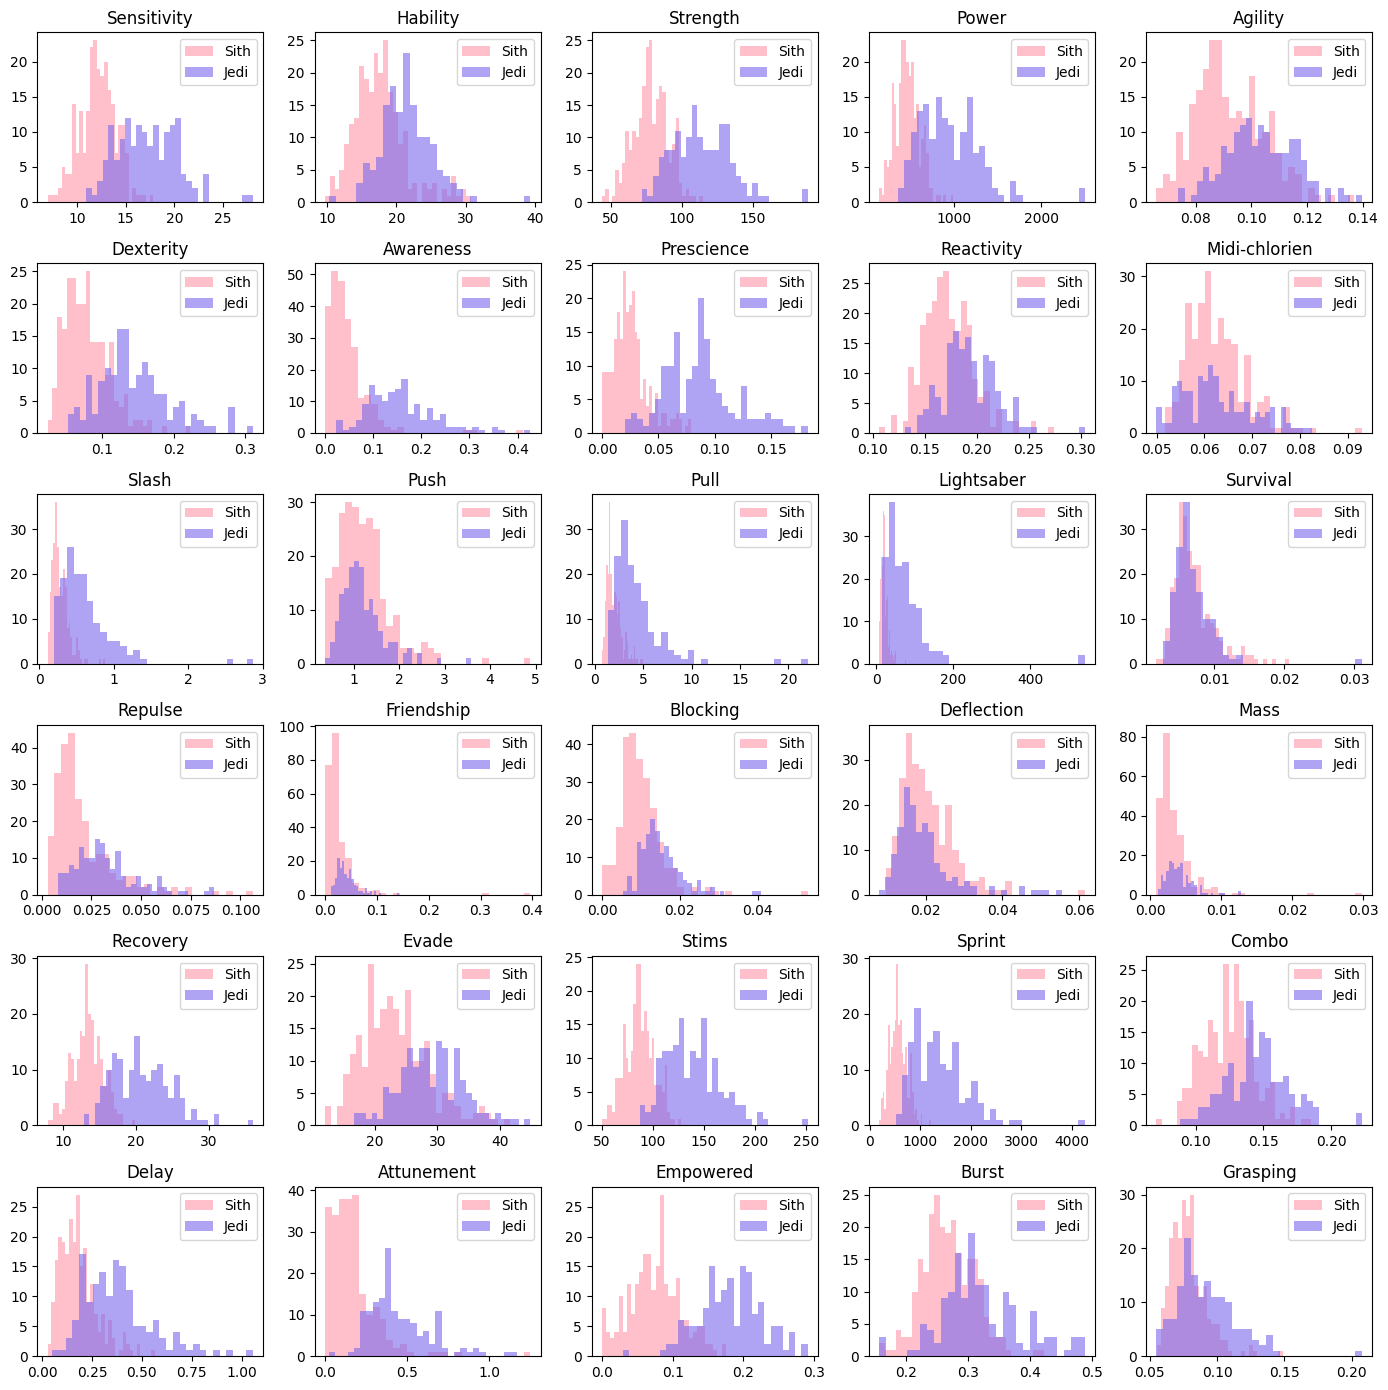

In [8]:
fig, axs = plt.subplots(6, 5, figsize=(14, 14))
for idx, ax in enumerate(axs.flat):
    ax.hist(train_knight[train_knight['knight'] == 'Sith'][features[idx]], label='Sith', bins=30, color='pink')
    ax.hist(train_knight[train_knight['knight'] == 'Jedi'][features[idx]], label='Jedi', bins=30, color='mediumslateblue', alpha=0.6)
    ax.legend()
    ax.set_title(f'{features[idx]}')
plt.tight_layout()
plt.show()

### Ex01

In [9]:
train_knight.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,Sith
3,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,Sith
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,Sith


In [10]:
train_knight_copy = train_knight.copy()

In [11]:
train_knight_copy['knight'] = train_knight_copy['knight'].astype('category').cat.codes

correlation_matrix = train_knight_copy.corr()
knight_correlation = correlation_matrix['knight']

sorted_correlations = knight_correlation.abs().sort_values(ascending=False)

sorted_correlations

knight           1.000000
Empowered        0.793652
Prescience       0.790066
Stims            0.786797
Recovery         0.777633
Sprint           0.739672
Strength         0.737403
Sensitivity      0.721566
Power            0.700709
Awareness        0.699662
Attunement       0.648893
Dexterity        0.631987
Delay            0.598072
Slash            0.550663
Pull             0.537800
Lightsaber       0.515340
Evade            0.465605
Hability         0.446632
Burst            0.445847
Combo            0.445223
Blocking         0.421950
Agility          0.397458
Reactivity       0.375103
Grasping         0.350105
Repulse          0.324399
Friendship       0.236633
Mass             0.113185
Survival         0.043099
Deflection       0.026489
Push             0.019446
Midi-chlorien    0.008132
Name: knight, dtype: float64

### Ex02

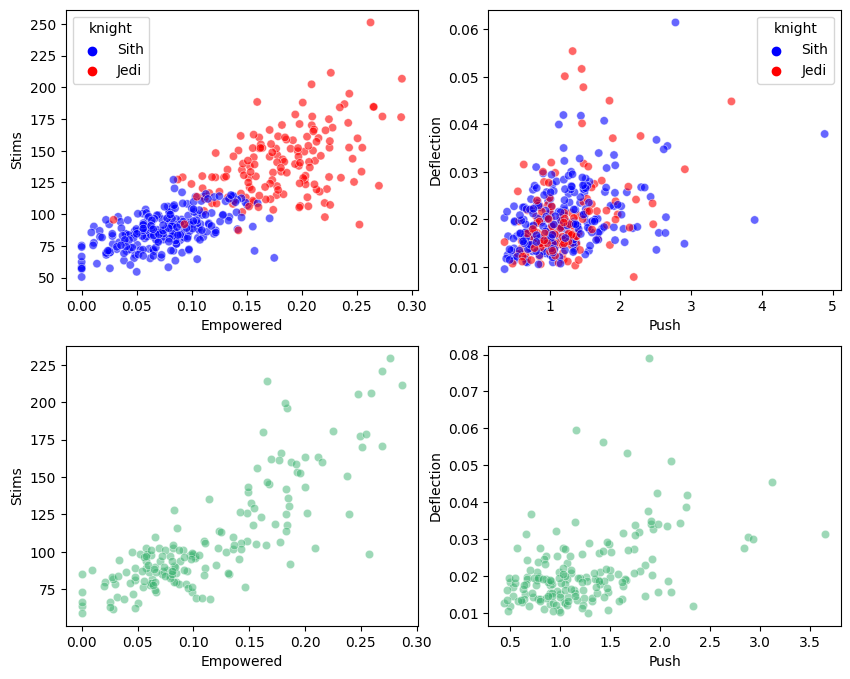

In [12]:
train_knight_copy = train_knight.copy()
test_knight_copy = test_knight.copy()

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

test_knight_copy['knight'] = train_knight_copy['knight']

sns.scatterplot(data=train_knight_copy, x='Empowered', y='Stims', hue='knight', ax=axs[0][0], palette=['blue', 'red'], alpha=0.6)
sns.scatterplot(data=train_knight_copy, x='Push', y='Deflection', hue='knight', ax=axs[0][1], palette=['blue', 'red'], alpha=0.6)

sns.scatterplot(data=test_knight_copy, x='Empowered', y='Stims', ax=axs[1][0], color='mediumseagreen', alpha=0.5)
sns.scatterplot(data=test_knight_copy, x='Push', y='Deflection', ax=axs[1][1], color='mediumseagreen', alpha=0.5)

plt.show()


### Ex03

In [13]:
# z = (x - u) / s
scaler = StandardScaler()

train_knight_scaled = train_knight_copy.copy()
test_knight_scaled = test_knight_copy.copy()

for column in train_knight_copy:
    if column != 'knight':
        train_knight_scaled[column] = scaler.fit_transform(train_knight_copy[[column]])
        test_knight_scaled[column] = scaler.transform(test_knight_copy[[column]])

In [14]:
train_knight_scaled

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,-0.672190,-0.447007,-0.701691,-0.647079,-0.408080,-0.812359,-0.770179,-0.867035,0.173459,-0.366543,...,-0.172521,-0.651490,-0.581014,-0.367009,-0.525921,-0.612764,-0.952936,-0.180659,-0.150547,Sith
1,1.671168,0.731340,1.624479,1.798709,0.139449,-0.019929,0.742230,1.222095,-0.826745,-1.308423,...,0.896162,2.461756,2.839651,0.805324,0.363692,1.210294,1.882921,-0.199724,-0.424881,Jedi
2,-0.915010,-0.461465,-0.851698,-0.825470,-0.534659,0.148840,0.066543,-0.342094,-1.177761,0.570808,...,0.225517,-0.523624,-0.740496,0.276024,0.945938,0.934721,0.607673,-0.594888,0.614445,Sith
3,-0.724850,-0.225314,-0.654097,-0.715305,1.551689,0.874940,0.160680,0.176467,0.588639,1.499103,...,-0.020330,-0.585395,-0.644173,1.977658,0.193766,0.194437,0.394877,-0.386907,0.472398,Sith
4,-0.830169,0.172288,-0.869971,-0.776442,-0.831973,-1.169325,-1.067454,-1.151858,-0.619156,0.122510,...,0.151931,-0.948607,-0.815952,-0.961925,-1.121724,-1.168418,-1.339338,-0.565424,-0.425966,Sith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-1.603097,-1.765116,-1.590684,-1.259634,0.081310,-1.000752,-0.870525,-1.095111,-0.445535,1.396463,...,-1.692759,-1.457598,-1.115912,1.772062,-0.830163,-0.743348,-1.096382,0.583670,0.340110,Sith
394,-0.166071,-1.969941,-0.164131,-0.271100,2.405362,0.019320,-0.260341,0.440133,2.272002,0.572318,...,-2.179436,-0.485944,-0.499969,0.538487,-0.742701,-0.889313,-0.638946,-0.300248,-0.654758,Sith
395,-0.718998,-0.189168,-0.705516,-0.704377,1.308834,-0.039553,-0.235889,-0.376116,-0.000161,0.389678,...,0.625228,-0.666624,-0.656097,1.575215,0.057575,0.048983,0.091757,-0.133864,0.378604,Sith
396,-1.235064,0.068671,-1.182308,-1.041666,0.300616,-0.132376,-0.351945,-0.497317,0.543346,0.090812,...,0.218828,-1.077090,-0.955126,1.010920,-0.166078,-0.057436,-0.280407,-0.452768,0.049511,Sith


<AxesSubplot: xlabel='Empowered', ylabel='Stims'>

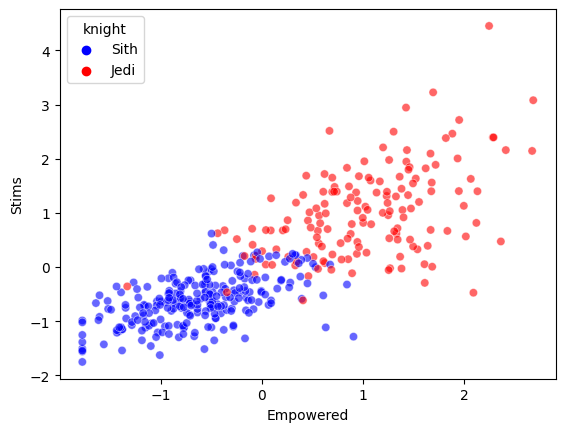

In [15]:
sns.scatterplot(data=train_knight_scaled, x='Empowered', y='Stims', hue='knight', palette=['blue', 'red'], alpha=0.6)

### Ex04

In [16]:
# Normalization
# z = (x - min(x)) / (max(x) - min(x))

train_knight_normalized = train_knight_scaled.copy()
test_knight_normalized = test_knight_scaled.copy()

for column in train_knight_scaled:
    if column != 'knight':
        train_knight_normalized[column] = (train_knight_scaled[column] - train_knight_scaled[column].min()) / (train_knight_scaled[column].max() - train_knight_scaled[column].min())
        test_knight_normalized[column] = (test_knight_scaled[column] - test_knight_scaled[column].min()) / (test_knight_scaled[column].max() - test_knight_scaled[column].min())

In [17]:
train_knight_normalized

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,0.228075,0.255326,0.217469,0.122333,0.339141,0.135019,0.066909,0.089852,0.397475,0.237907,...,0.379604,0.177250,0.092607,0.351516,0.140980,0.115735,0.184055,0.365993,0.171652,Sith
1,0.607175,0.420697,0.595743,0.473595,0.439627,0.275247,0.346857,0.521009,0.263636,0.092791,...,0.574125,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.362677,0.138463,Jedi
2,0.188793,0.253297,0.193076,0.096713,0.315910,0.305112,0.221787,0.198190,0.216667,0.382326,...,0.452055,0.197868,0.071569,0.448590,0.369561,0.381709,0.534364,0.293940,0.264200,Sith
3,0.219556,0.286439,0.225209,0.112534,0.698811,0.433602,0.239212,0.305211,0.453030,0.525349,...,0.407306,0.187908,0.084275,0.705474,0.252748,0.254473,0.486598,0.330118,0.247016,Sith
4,0.202518,0.342239,0.190104,0.103754,0.261345,0.071850,0.011883,0.031070,0.291414,0.313256,...,0.438661,0.129339,0.061615,0.261705,0.048452,0.020232,0.097320,0.299065,0.138331,Sith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.077476,0.070342,0.072904,0.034358,0.428957,0.101681,0.048335,0.042781,0.314646,0.509535,...,0.102892,0.047263,0.022046,0.674437,0.093732,0.093291,0.151856,0.498945,0.231011,Sith
394,0.309953,0.041596,0.304886,0.176331,0.855484,0.282192,0.161280,0.359627,0.678283,0.382558,...,0.014307,0.203944,0.103298,0.488212,0.107314,0.068203,0.254536,0.345191,0.110652,Sith
395,0.220503,0.291512,0.216847,0.114104,0.654241,0.271774,0.165807,0.191168,0.374242,0.354419,...,0.524810,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.374133,0.235668,Sith
396,0.137015,0.327697,0.139313,0.065663,0.469206,0.255348,0.144325,0.166155,0.446970,0.308372,...,0.450837,0.108621,0.043256,0.559532,0.196864,0.211182,0.335017,0.318661,0.195855,Sith


<AxesSubplot: xlabel='Push', ylabel='Deflection'>

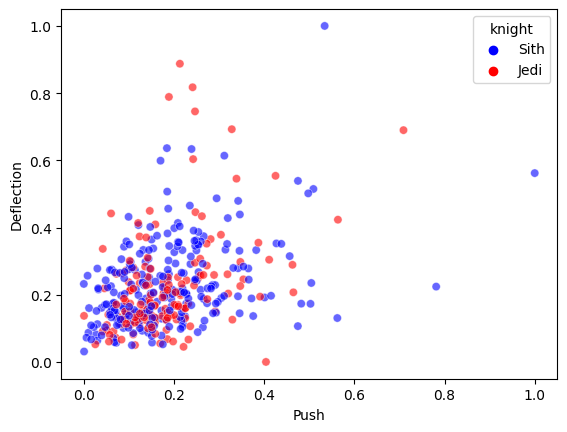

In [18]:
sns.scatterplot(data=train_knight_normalized, x='Push', y='Deflection', hue='knight', palette=['blue', 'red'], alpha=0.6)

### Ex05

The validation set is used during the training phase of the model to provide an unbiased evaluation of the model's performance and to fine-tune the model's parameters.
The test set, on the other hand, is used after the model has been fully trained to assess the model's performance on completely unseen data.

I still need to change the notebook to a program etc..

In [19]:
train_knight_normalized.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,0.228075,0.255326,0.217469,0.122333,0.339141,0.135019,0.066909,0.089852,0.397475,0.237907,...,0.379604,0.177250,0.092607,0.351516,0.140980,0.115735,0.184055,0.365993,0.171652,Sith
1,0.607175,0.420697,0.595743,0.473595,0.439627,0.275247,0.346857,0.521009,0.263636,0.092791,...,0.574125,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.362677,0.138463,Jedi
2,0.188793,0.253297,0.193076,0.096713,0.315910,0.305112,0.221787,0.198190,0.216667,0.382326,...,0.452055,0.197868,0.071569,0.448590,0.369561,0.381709,0.534364,0.293940,0.264200,Sith
3,0.219556,0.286439,0.225209,0.112534,0.698811,0.433602,0.239212,0.305211,0.453030,0.525349,...,0.407306,0.187908,0.084275,0.705474,0.252748,0.254473,0.486598,0.330118,0.247016,Sith
4,0.202518,0.342239,0.190104,0.103754,0.261345,0.071850,0.011883,0.031070,0.291414,0.313256,...,0.438661,0.129339,0.061615,0.261705,0.048452,0.020232,0.097320,0.299065,0.138331,Sith


In [20]:
train_df, validation_df = train_test_split(train_knight_normalized, test_size=0.3)

In [21]:
train_df.to_csv('./knights/Training_knight.csv', index=False)
validation_df.to_csv('./knights/Validation_knight.csv', index=False)